In [1]:
import numpy as np
import matplotlib.pyplot as plt

# `Segundo Bloque`

## Nociones de estadísticas
- Fitting. Regresión lineal de los Mínimos al cuadrado (Linear Least-Squares Fitting)
    - Estadística del método Chi Squared
    - Fit de la linea recta
        - Parámetros de estimación y variancia
    - Fit General para una función normal
        - Ecuaciones normales
- Inferencia estadística lineal
    - Enfoque de máxima verosimilitud (Maximum-Likelihood Approach)
    - Regla de Bayes
- Fitting. Regresión No lineal de los Mínimos al cuadrado (Non-Linear Least-Squares Fitting)
    - Método de Gauss-Newton
    - Redes Neuronales (Artificial Neural Networks)

## Fitting. Regresión lineal de los Mínimos al Cuadrado

Como fue comentado en la conferencia de interpolación, existe un método que aunque no pasa por todo el conjunto de pares de puntos $(x_j, y_j)$ es capaz de capturar la información codificada en los datos. 

¿Cuándo debemos usar esta metodología?

La situación más usual es cuando no podemos creer ciegamente en los datos. Es decir, cuando punto de los datos tiene una incertidumbre de entrada asociada $\sigma_j \to y_j\pm \sigma_j$. En este caso no hemos de exigir que nuestra función aproximada $p(x)$ pase por todos los datos, sino que se intentará encontrar una que sea capaz de capturar el comportamiento de estos (incluyendo su errores asociados). Ahora, como imaginarán existen infinitas opciones para la funcion aproximada $p(x)$, sin embargo usualmente los datos tienen un modelo teórico de fondo el cual tiene ciertos parámetros libres que serían los que ajustaríamos. En el caso que no se conozca dicho modelo, pues pensando un poco en la serie de Taylor se propone un polinomio de $x$, cuyos parámetros libres serían los respectivos coeficientes. IMPORTANTE, en este último caso, se ha de escoger un polinomio de bajo grado, ya que cuanto mayor sea el grado, mayor será el número de parámetros indeterminados: ya que NO confiamos plenamente en los datos de entrada, no queremos capturar la *dispersión* (scatter), sino sólo la tendencia subyacente en los datos.

<center><img src="capturas/223.png"></center>

### Estadística del método Chi Squared

Consideremos una expansión de nuestra aproximación $p(x)$ de la forma:
$$
p(x)=\sum_{k=0}^{n-1} c_k \phi_k(x)
$$
donde $c_k$ serían los coeficientes y $ \phi_k(x)$ las funciones bases las cuales pueden ser o no polinomalies (recordar lo visto en la conferencia de interpolación). Como se aprecia, este es un problema **lineal** en el sentido de que la función de aproximación $p(x)$ es una combinación lineal de los coeficientes $c_k$. A esta función de aproximación en el contexto de Chi Squared le llamaremos **teoría o modelo**.


`Otra particularidad (diferencia)` que se tiene con respecto a la interpolación, es que SIEMPRE tendremos más datos que parámetros libres del modelo (aún cuando usemos un polinomio), es decir $N>n$.

`IMPORTANTE:` Si seguimos la misma idea de la interpolación donde usamos los $N$ datos para encontrar los $n$ parámetros libres, entonces estaríamos ante un sistema sobre-determinado, es decir $\Phi C = y$

<center><img src="capturas/224.png"></center>

Notar que los datos $y_j$ se agrupan en un vector de columna de dimensión $N \times 1$, $\Phi$ es una matriz de $N \times n$ y estaríamos resolviendo el vector de columna $C$ de $n \times 1$ dimension.

Como se puede ver, el sistema no se puede resolver (comparar vectores columnas), e incluso si pudiera, sabemos que nuestros valores $y_j$ adolecen de errores, los cuales no están *capturados*.

`¿QUÉ HACER?`

Para abordar este sistema sobredeterminado y capturar la información del error lo que haremos es `intentar miminizar la norma del vector residual` (recuerden que miminizar es equivalente a encontrar un extremo), es decir
$$
\min ||\Phi C-y||
$$
donde la norma usada sería la [Euclideana](https://es.wikipedia.org/wiki/Norma_vectorial), $||(x_1, \dots, x_n)||=\sqrt{x_1^2+\dots+x_n^2}$. Notar que decimos residual puesto que estamos encontrando la resta. En otras palabras: `encontraremos los valores para` $c_j$ `capaces de darnos el resultado (para esta diferencia) más cercano a cero`.

Vale, hasta acá todo parece lógico, sin embargo, `¿dónde entran las incertidumbres en de los datos?`. Por lo visto hasta ahora nuestro resultado dependerá de la base usada y de los datos de entrada, no de sus errores asociados. Por otro lado, supongamos la siguiente situación:

*Consideremos que algunos de los datos de entrada tienen grandes incertidumbres y tal vez también parezcan mostrar un comportamiento diferente al resto. Uno esperaría que la metodología desarrollada fuera capaz de ponderar los puntos con mayor incertidumbre diferente al resto, es decir, no deberían afectar nuestra aproximación final tanto como los puntos que se midieron con mucha más precisión.*

Bueno, la metodología capaz de capturar la incertidumbre $\sigma_j$ y ponderarla de forma correcta es la llamada estadística chi-cuadrado (estadística porque es función de los datos), la cual consiste en minimizar la función:
$$
\chi^2=\sum_{j=0}^{N-1}\left(\frac{y_j-p(x_j)}{\sigma_j}\right)^2
$$

donde $x_j, y_j$ son las variables independiente y dependiente respectivamente. Nótese que la suma se realiza sobre todos los datos $N$ y que aproxima a la función $p(x)$ dependiendo implícitamente de los parámetros $c_k$. Además se logra lo solicitado, **cuando la incertidumbre de una entrada dada es grande, la contribución de ese término a la suma es pequeña, como debería ser.** 

`¿Ya notan por qué el nombre de mínimos cuadrados?`  De la ecuación se aprecia que miminizaremos $\chi^2$, que no es más que la distancia entre la teoría $p(x_j)$ y los datos $y_j$, ponderada por el tamaño de la barra de error en los últimos.

Bueno, procedamos a miminizar la función respecto a los parámetros libres $c_k$, es decir computemos $\partial \chi^2/\partial c_k$:
<center><img src="capturas/225.png"></center>

`Comentarios`:
- El índice $k=0,1, \dots, n-1$.
- Al tomar la derivada parcial $\partial p(x_j)/\partial c_k$ consideramos *fijos* a $x_j, y_j$.
- Si asumimos que la función de aproximación $p(x)$ es lineal en las $c_k$ (tiene la estructura comentada inicialmente), tendremos que estas derivadas pueden tomarse de manera trivial.

Más adelante profundizaremos en algunas cuestiones estadísticas del resultado anterior. Por ahora centrémosno en como comparar diferentes teorías. Como vimos miminizar la $\chi^2$ nos dice como encontrar las mejores $c_k$ para una teoría dada, sin embargo, ¿qué pasa si la teoría es incorrecta? Pues en este caso el proceso de miminización de mínimos al cuadrado te dará los *mejores* valores, sin embargo el resultado puede seguir siendo inadecuado. Algo que puede notarse al graficar el resultado.

En la práctica si asumimos que los errores se distribuyen normalmente (luego veremos a que nos referimos con esto), si el mínimo de $\chi^2$ es muy grande, de la propia definición se puede apreciar que no se puede obtener un $p(x)$ que se acerque a los puntos de los datos. Lo cual puede estar asociado a un error en el modelo. Por el contrario, si el mínimo de $\chi^2\approx 0$, tendremos que la curva teórica esencialmente pasaría por los datos, lo cual indicaría que el modelo teórico es bueno. `¿cierto?`

Pues bueno, nada es en blanco y negro, depende de otros factores. 
- Por ejemplo, si a la hora de obtener los datos, sus respectivos $\sigma_j$ fueron subestimados (es decir, en realidad son muchos más grandes), en este caso puede que el modelo que parecía malo en principio no lo sea. 
- Otro ejemplo es que tener un modelo con $\chi^2\approx 0$ no siempre es un buen resultado. Puede ocurrir que tengamos demasiados parámetros libres y lo que esté ocurriendo es un *sobreajuste* (overfitting), es decir, estamos capturando la dispersión aleatoria en los datos y no su comportamiento. 
- Otro ejemplo es similar al primero, pero ahora pudieramos tener una sobreestimación de las $\sigma_j$ (es decir, en realidad pudieran ser mucho más pequeños) y por tanto nuestro modelo no es el adecuado aún cuando nos de $\chi^2\approx 0$.

`Entonces la pregunta sería:` ¿cómo interpretar si es un buen resultado o no, tener un valor *grande* o *pequeño* de $\chi^2$?. 

Pues como regla general se suele considerar como buen fit sí, $\chi^2\approx N-n$. Si recuerdan de lo visto en clases, **la diferencia entre el número de puntos de datos y el número de parámetros**, $N − n$, `se conoce como número de grados de libertad`. Por lo tanto, `la regla general se puede reformular diciendo que un ajuste no es demasiado bueno, ni demasiado malo si el chi-cuadrado entre los grado de libertad sea aproximadamente uno.`


`Comentario:` En el caso en que no contemos con los errores $\sigma_j$, podemos asumir que todos son iguales, y la regla general seguirá siendo un buen criterio, y una vez que tengamos el valor de $\chi^2$, usaríamos la expresión:
$$
\chi^2=\sum_{j=0}^{N-1}\left(\frac{y_j-p(x_j)}{\sigma_j}\right)^2
$$
para encontrar el $\sigma$ asumido. Es cierto que esto no te ayuda a comprobar qué tan bien se hizo el ajuste, ya que se asume que fue el mejor, sin embargo es una buena forma de proceder cuando no se cuenta con el error.

### Fit de la linea recta

A continuación vemos como aplicar todo lo anterior a un modelo sencillo, la linea recta:
$$
p(x)=c_0+c_1 x
$$

Consideremos que tenemos $N$ datos tipo $(x_j, y_j)$, con sus respectivos $\sigma_j$. Si evaluamos en la teoría de chi-cuadrado tendremos
<center><img src="capturas/226.png"></center>

donde tendremos que determinar el mejor valor para $c_0, c_1$. Para ello haremos uso de algunas herramientas estadísticas.

#### Parámetros de estimación y variancia

Si miminizamos la función anterior tendremos que:
<center><img src="capturas/227.png"></center>

donde como se aprecia apareción un delta en la derivación. A continuación podemos podemos dividir cada numerador en tres términos y expresar las dos ecuaciones anteriores como:
<center><img src="capturas/229.png"></center>

donde hemos hecho uso de:
<center><img src="capturas/228.png"></center>

Nótese que todas las nuevas variables se expresan en términos de cantidades conocidas, lo que significa que se pueden calcular a partir de los datos. El sistema anterior se puede expresar de forma matricial como
<center><img src="capturas/230.png"></center>

lo que nos lleva, luego de invertir la matriz a que los mejores valores (los que miminizan a $\chi^2$) para las $c_k$ son:
<center><img src="capturas/231.png"></center>

`notar` que las cantidades del lado derecho se pueden computar de los datos.

Bueno, uno estaría tentado a pensar que ¡¡ya quedó!!, sin embargo, hemos pasado algo por alto. Tenemos errores $\sigma_j$, ¿cierto? pues estos han de introducir una incertidumbre que se propagaría en el cálculo de las $c_k$, por ende debemos tener presente en nuestro resultado dicha propagación.

Recordando lo visto en la conferencia de errores, partamos de suponer que los datos son independientes y por tanto la propagación sería de la forma  
<center><img src="capturas/232.png"></center>

donde $g$ para nuestro caso será $c_0, c_1$. Computando las derivadas tendremos:
<center><img src="capturas/233.png"></center>

Notar que se usó los resultados obtenidos para $c_0, c_1$. La primera ecuación nos ayuda a determinar $\sigma^2_{c_0}$ y la segunda $\sigma^2_{c_1}$. Sustituyendo estas en la expresión obtenida de propagar el error, se llega a:
<center><img src="capturas/234.png"></center>

Estas son las variaciones en las estimaciones de nuestros dos parámetros. Para calcular las desviaciones estándar, se tendrña  que sacar la(s) raíz(es) cuadrada(s).

In [10]:
# implementación

# calculando las funciones abreviada de los datos
def funcionesSAbrev(dataxs, datays, datasigs):
    Sf = np.sum(1/datasigs**2)
    Sxf = np.sum(dataxs/datasigs**2)
    Syf = np.sum(datays/datasigs**2)
    Sxxf = np.sum(dataxs**2/datasigs**2)
    Sxyf = np.sum(dataxs*datays/datasigs**2)
    Triangf = Sf*Sxxf - Sxf**2
    return Sf, Sxf, Syf, Sxxf, Sxyf, Triangf

# calculando los coeficientes ck
def computecs(dataxs, datays, datasigs):
    
    # calculando las funciones abreviadas
    Sf, Sxf, Syf, Sxxf, Sxyf, Triangf = funcionesSAbrev(dataxs, datays, datasigs)
    
    # calculando los coeficientes
    cs = np.zeros(2)  # mejor ajuste
    sigcs = np.zeros(2)  # desviación estandar
    
    cs[0] = (Sxxf*Syf - Sxf*Sxyf)/Triangf
    cs[1] = (Sf*Sxyf - Sxf*Syf)/Triangf
    sigcs[0] = np.sqrt(Sxxf/Triangf)  # recordar que Sxxf/Triangf es la varianza
    sigcs[1] = np.sqrt(Sf/Triangf)
    return cs, sigcs

def chisqf(dataxs, datays, datasigs, cs):
    chisq = np.sum((datays-cs[0]-cs[1]*dataxs)**2/datasigs**2)
    return chisq

In [15]:
# ejemplo
dataxs = np.linspace(0, 1, 6)  
datays = np.array([3.085, 3.123, 3.224, 3.360, 3.438, 3.569])
datasigs = np.array([0.048, 0.053, 0.02, 0.005, 0.023, 0.07])

# obteniendo las ck
cs, dcs = computecs(dataxs, datays, datasigs)

print('El mejor ajuste es: c0 =%5.4f, c1=%5.4f'%(cs[0], cs[1]))
print('Las respectivas desviaciones estandar son:', dcs)

# calculando el valor de chi^2
chisq = chisqf(dataxs, datays, datasigs, cs)

print()
print('El valor para \chi^2 es ', chisq)  # notar que este valor no es muy cercano a 0, pero al usar la regla general nos da algo decente
print('El valor para \chi^2 por grado de libertad es: ', chisq/(dataxs.size - cs.size))  # notemos como está cercano a 1, lo cual es un fit decente

El mejor ajuste es: c0 =3.0459, c1=0.5189
Las respectivas desviaciones estandar son: [0.02927752 0.04896135]

El valor para \chi^2 es  4.396672782174086
El valor para \chi^2 por grado de libertad es:  1.0991681955435215


Text(0, 0.5, 'y')

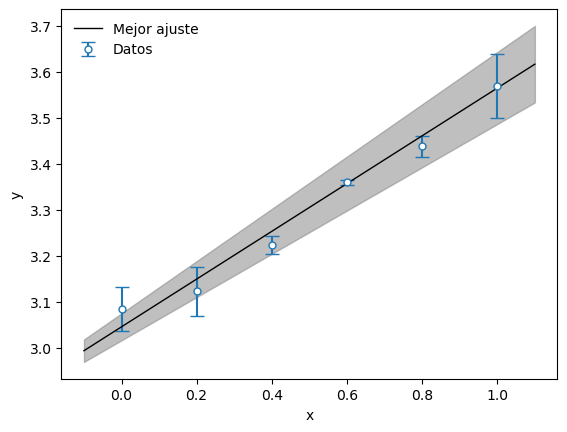

In [34]:
model = lambda x, c0, c1: c0 + c1*x
xval = np.linspace(min(dataxs)-0.1, max(dataxs)+0.1, 50) 

fig, ax = plt.subplots()
ax.errorbar(dataxs, datays, xerr=None, yerr=datasigs, capsize=5, ls='', marker='o', mfc='white', ms=5, mew=1, label=r'Datos')
ax.plot(xval, model(xval, *cs), ls='-', lw=1, c='k', label=r'Mejor ajuste')
ax.fill_between(xval, model(xval, *(cs+dcs)), model(xval, *(cs-dcs)), color='gray', alpha=0.5)
ax.legend(frameon=False)

ax.set_xlabel('x')
ax.set_ylabel('y')

## Fit General para una función normal

A continuación podemos intentar generalizar el procedimiento anterior, sin embargo, es fácil ver que no es tan fácil. Por ejemplo, imaginemos que queremos comprobar si el escoger el modelo lineal fue correcto. Una forma de hacerlo sería probar una teoría cuadrática:
<center><img src="capturas/235.png"></center>

y repetir el procedimiento anterior, pero ahora teniéndo tres parámetros libres. Lo que nos lleva a:
<center><img src="capturas/236.png"></center>

Notar que ahora tenemos nuevos términos tipo $S_{xxxx}$. De lo visto anteriormente sabemos que el invertir una matriz suele acarrear bastantes errores si esta está mal condicionada, en especial si la dimensión es grande. Sin embargo, al realizar un ajuste de mínimos cuadrados, generalmente no se utiliza un polinomio de grado muy alto puesto que como se mencionó esto conduce principalmente a un sobreajuste, es decir, a capturar la dispersión aleatoria en los datos, que es un resultado no deseado. Es decir, normalmente no tendrémos problema de errores al invertir la matriz $3\times 3$. Pero como vimos del modelo lineal nuestro tratamiento es analítico y para matrices de dimensión superior puede ser complicado la inversión, teniéndose que recurrir a métodos numéricos, o a meditar sobre hasta que orden hemos de llegar.

Ahora, que ocurre sino usamos un modelo polínómico, por ejemplo:
<center><img src="capturas/237.png"></center>

Notar que este sigue siendo un modelo lineal en el parámetro libre (en las $c_i$); es sólo una de las funciones de base no es lineal (en $x$) lo que como veremos nos obligará a introducir variables auxiliares como:
<center><img src="capturas/238.png"></center>

lo cual es una generalización directa de lo visto para el caso de la línea recta. Obviamente, si tuvieras tres (o, digamos, siete) parámetros, un tratamiento analítico ya no sería muy práctico.

### Ecuaciones normales

A continuación intentemos abordar el problema anterior (siempre lineal) de forma general, en vez de estudiar modelo a modelo, partamos de la definición vista:
<center><img src="capturas/239.png"></center>

donde los modelos polinomiales son un caso particular cuando los términos de la base $\phi_k(x)$ son monomios.

Implementemos entonces una metodología general que nos permita obtener el mejor ajusta para cualquier conjunto de funciones básicas. De manera directa tendremos que el modelo $\chi^2$ se generalizaría a:
<center><img src="capturas/240.png"></center>

Miminizando tendremos que:
<center><img src="capturas/241.png"></center>

donde $k=0,1,\dots, n-1$. Eliminando el coeficiente $−2$ y reordenando los términos (e intercambiamos el orden de suma) se llega a
<center><img src="capturas/242.png"></center>

lo cual se puede escribir como:

<center><img src="capturas/244.png"></center>

donde introducimos las nuevas variables:
<center><img src="capturas/243.png"></center>

Notar que $A=\{A_{jk}\}$ es una matriz rectángular $N\times n$ (cuyas filas van de $0$ hasta $N-1$ y columnas de $0$ a $n-1$), mientras que $b$ es un vector columna de dimensión $N-1$, compuesto de los los errores asociados a las mediciones. Es decir, los elementos de $A, b$ pueden ser computados de los datos.

Por otro lado, teniendo presente que el producto matricial no es más que:
<center><img src="capturas/248.png"></center>

Notemos que la suma por el índice $j$ se pueden reemplazar mediante la multiplicación matriz-matriz (en el lado izquierdo) y multiplicación matriz-vector (en el lado derecho), es decir
<center><img src="capturas/245.png"></center>

donde se introdujo `apropiadamente` la transpuesta de $A$ ya que necesitábamos que dos índices aparecieran en diferente orden. 

De forma similar podemos percatarnos que la suma sobre $i$ en el lado izquierdo se puede expresar en términos de una multiplicación matriz-vector, lo que nos lleva a escribir:
<center><img src="capturas/246.png"></center>

Como se aprecia esta igualdad es válida para cualquier componente $k$, es decir
<center><img src="capturas/247.png"></center>

`¡Ya cumplimos el objetivo!` Noten que tanto $A$ como $b$ son conocidos (calculados en términos de los datos de entrada), esta ecuación es un sistema lineal simple de ecuaciones: podemos resolverlo usando métodos numéricos matriciales.

`Comentarios:`
- Noten que la dimensión de $A$ es $N \times n$, lo que significa que $A^T$ es $n\times N$ y, por lo tanto, $A^TA$ es $n \times n$.

### Interpretando la aproximación general

A continuación interpretemos el resultado anterior. El objetivo es demostrar que el vector $c$ encontrado no solo corresponde a un punto crítico, sino que represetna un mínimo del modelo. 

Notemos los siguientes detalles:

- El producto $A^T A$ es simétrico producto de que este es igual a su traspuesta.
<center><img src="capturas/249.png"></center>

- El producto $A^T A$ es positivo semidefinido para cualquier vector $x$ no trivial, es decir:
<center><img src="capturas/250.png"></center>

donde la norma usada es la Euclideana.

Si escribimos el vector $A$ en términos de sus columnas $a_i$:
<center><img src="capturas/251.png"></center>

y consideramos que estas son linealmente independientes, entonces el producto $Ax$ quedaría como:
<center><img src="capturas/252.png"></center>

donde la desigualdad con cero es producto de que las columnas son linealmente independiente. 

Con lo anterior hemos demostrado que $||Ax||^2\neq 0$ lo que en conjunto a que es definido positivo tendremos que: $||Ax||^2>0$, es decir, $A^T A$ es definida positiva si las columnas de $A$ son linealmente independientes.

En términos de las cantidades $A, b$ podemos reescribir la generalización del modelo $\chi^2$:
<center><img src="capturas/240.png"></center>

a una forma matricial como: 
<center><img src="capturas/253.png"></center>

donde con toda intención se puso explicitamente la dependencia de los parámetros $c_k$. Expandiendo la expresion vectorial tendremos:
<center><img src="capturas/254.png"></center>

Introduciendo la matriz Hessiana
<center><img src="capturas/255.png"></center>

y realizando una expansión multidimensional de Taylor hasta orden $q^3$ ($q$ vector) tendremos que:
<center><img src="capturas/256.png"></center>

donde ha de notarse que para nuestro caso $H=2A^T A$ (matriz Hessiana), esto es debido a que la única contribución a la segunda derivada vendrá de la forma cuadrática (en c) $c^T A^T A c$.

Ahora puesto que los valores de $c^*$ son aquellos que garantizan que la primera derivada sea cero (punto crítico), es decir 
<center><img src="capturas/257.png"></center>

tendremos entonces que:
<center><img src="capturas/258.png"></center>

lo cual demuestra que los puntos $c_i^*$ son un mínimo siempre y cuando la matriz Hessiana $H$ sea definida positiva.


### Variancia

Similar al caso lineal, ahora hemos de proceder a encontrar la incertidumbres en estas estimaciones, para ello usamos una metodología similar. La relación general a la ecuación de propagación del error sería:
<center><img src="capturas/260.png"></center>

donde similar al caso lineal asumimos que las incertidumbres no están correlacionados, es decir, que las mediciones son independientes. Para calcular $\sigma_{c_i}^2$ necesitaremos la derivada del parámetro $c_i$ con respecto al dato $y_j$, es decir, $\partial c_i/\partial y_j$ para obtenerlaprimero necesitamos escribir $c_i$ como función de $y_j$, veamos como:

Multiplicando nuestra aproximación general
<center><img src="capturas/247.png"></center>

por $(A^T A)^{-1}$ por la izquierda, encontramos:
<center><img src="capturas/261.png"></center>

si definimos 
<center><img src="capturas/262.png"></center>

tendremos que
<center><img src="capturas/263.png"></center>

Notar que lo que hicimos en cada igualdad fue el proceso inverso al realizado para obtener la aproximación general. El resultado final es lo deseado, $c_i$ en función de $y_j$. Puesto que $V_{ik}$ no depende de $y_j$ podemos evaluar directamente la derivada necesaria:
<center><img src="capturas/264.png"></center>

donde notarás que la suma sobre $l$ ya no existe.

Sustituyendo el resultado en la expresión para la dispersión tendremos
<center><img src="capturas/265.png"></center>

donde intercambiamos el orden de suma y cancelamos uno de los $\sigma_{j}^2$. El término dentro del paréntesis también se puede reexpresar como:
<center><img src="capturas/266.png"></center>

donde en la última igualdad nos percatamos que lo obtenido es nuestra matriz $U$. Reintroduciendo este resultado en la expresión previa tendremos
<center><img src="capturas/267.png"></center>

donde en la segunda igualdad reordenamos las sumas y los términos, y en la tercera igualdad nos dimos cuenta de que $V$ es la inversa de $U$, por lo que su producto es la identidad, lo que nos lleva a:
<center><img src="capturas/268.png"></center>

es decir, los elementos diagonales de la matriz $V$ son las varianzas de las estimaciones de los parámetros $c$. 

`Comentario:` 
- Los elementos de la matriz fuera de la diagonal de $V$ son las covarianzas entre diferentes parámetros, es decir, $V_{ik}$ es la covarianza entre los parámetros $c_i$ y $c_k$. 
- La matriz $V$ se conoce como matriz de *varianza-covarianza*.

### Implementación

A continuación implementemos el método general, para ello primero definiremos una función que nos genere los vectores bases. En particular (y con ánimo de demostrar que este formalismo es general) implementamos dos conjuntos distintos de funciones de base: 
- monomios
- comportamiento sinusoidal

Por supuesto, para ambos casos la dependencia de los $c_k$ es lineal. 

En la función `fbase()` elegimos diferenciar entre los dos tipos diferentes de teoría en función del valor del tamaño del problema, $n$
- $n = 5$ se interpreta como monomios hasta cuarto grado
- $n = 2$ se interpreta como $1$ o como $\sin(x)$.

A continución definimos una metodología general (que aplica a cualquier base) `Gnormalfit`, la cual computará los $c_k$ y calculará el mínimo valor para $\chi^2$. La idea es similar al caso lineal, el único cambio es que esta vez también pasamos explícitamente el número de parámetros, $n$.
Pasos:
- Crear la matriz rectangular $A$ $(N \times n)$, implementando la definición de $A_{jk}
- De manera similar definimos el vector de columna $b$ según su definición.
- Habiendo calculado $A$ y $b$, resolvemos el sistema lineal $A^T A c = A^T b$. Notar que usaremos la abreviación `@` para realizar la multiplicación matriz-matriz o matriz-vector.
- Una vez obtenido los $c_k$ podemos calcular el mínimo $\chi^2$ utilizando su implementación vectorial vista.
- Para calcular 

In [28]:
# Implementación
def fbase(n, k, x):
    if n==5:
        val = x**k
    elif n==2:
        val = 1. if k==0 else np.sin(x)  # 1*c0 + c1*sin(x)
    return val


def Gnormalfit(dataxs, datays, datasigs, n):
    N = dataxs.size
    A = np.zeros((N, n))  # notar la dimensión
    
    for k in range(n):
        A[:, k] = fbase(n, k, dataxs)/datasigs  # A_{jk} = phi_k(x_j)/sigma_j
    bs = datays/datasigs  # b_j = y_j/sigma_j
    
    matI = A.T@A  # np.dot(A.T, A)
    InvmatI = np.linalg.inv(matI) 
    matD = A.T@bs
    cs = InvmatI@matD
    
    sigS = np.diagonal(InvmatI)
    chisq = np.sum((bs - A@cs)**2)  # (bs - A@cs).T@(bs - A@cs)
    
    return cs, chisq, sigS

In [29]:
# ejemplo

# generando datos
N = 8
np.random.seed(45379)  # fijando la semilla
dataxs = np.linspace(0, 9, N)
datays = 2 + 5*np.sin(dataxs) + 0.3*np.random.randn(N)  # la última parte es el ruido
datasigs = 0.2*np.abs(np.random.randn(N))

csVal, sigVal = [], []
for n in (5, 2):
    cs, chisq, sigS = Gnormalfit(dataxs, datays, datasigs, n)
    csVal.append(cs)
    sigVal.append(np.sqrt(sigS))
    print()
    print('El valor para \chi^2 es ', chisq) 
    print('El valor para \chi^2 por grado de libertad es: ', chisq/(dataxs.size - cs.size))
    print('El valor de los parámetros c_i son ', cs)


El valor para \chi^2 es  92.61586999122268
El valor para \chi^2 por grado de libertad es:  30.871956663740892
El valor de los parámetros c_i son  [ 1.47186742 12.67496537 -7.59753631  1.34261678 -0.07237913]

El valor para \chi^2 es  20.520842575950716
El valor para \chi^2 por grado de libertad es:  3.4201404293251194
El valor de los parámetros c_i son  [1.96876068 5.19901685]


(-5.0, 12.5)

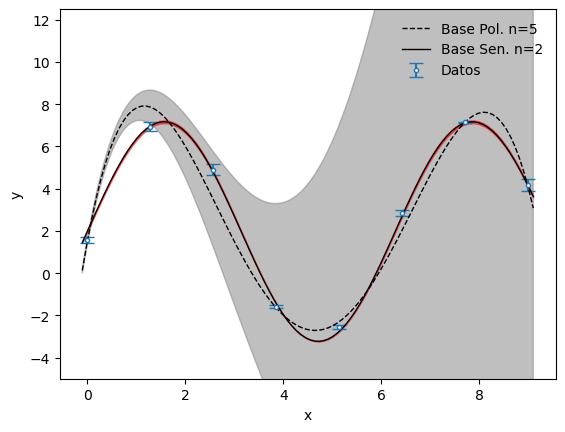

In [30]:
model = lambda x, c0, c1, c2, c3, c4: c0 + c1*x + c2*x**2 + c3*x**3 + c4*x**4
model2 = lambda x, c0, c1: c0+c1*np.sin(x)
xval = np.linspace(min(dataxs)-0.1, max(dataxs)+0.1, 100) 

fig, ax = plt.subplots()
ax.errorbar(dataxs, datays, xerr=None, yerr=datasigs, capsize=5, ls='', marker='o', mfc='white', ms=3, mew=1, label=r'Datos')
ax.plot(xval, model(xval, *csVal[0]), ls='--', lw=1, c='k', label=r'Base Pol. n=%d'%len(csVal[0]))
ax.plot(xval, model2(xval, *csVal[1]), ls='-', lw=1, c='k', label=r'Base Sen. n=%d'%len(csVal[1]))

ax.fill_between(xval, model(xval, *(csVal[0]+sigVal[0])), model(xval, *(csVal[0]-sigVal[0])), color='gray', alpha=0.5)
ax.fill_between(xval, model2(xval, *(csVal[1]+sigVal[1])), model2(xval, *(csVal[1]-sigVal[1])), color='red', alpha=0.5)

ax.legend(frameon=False)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_ylim(-5, 12.5)

## Inferencia estadística lineal

Anteriormente tratamos la regresión lineal (ajuste lineal) como un problema de optimización donde se asumía el modelo de $\chi^2$ y se míminizaba, llegando a la fórmula general. Durante los diferentes procedimientos partimos del supuesto de que las incertidumbres de los datos de entrada se distribuyen normalmente y que la estimación obtenída correspondía a la máxima verosimilitud (en ingles maximum-likelihood parameter estimation). A continuación expliquemos un poco más al respecto.

`IMPORTANTE:`
Antes de continuar, es necesario tener claro el concepto de regresión lineal. En métodos numéricos, usualmente cuando usamos el término `fitting` significa que `existe una relación exacta` entre dos cantidades medidas, mientras que al usar el término `regresión` nos referimos a que se extraerá algún tipo de correlación entre dos cantidades, incluso en ausencia de un modelo que explique esta dependencia; En la práctica (y como han visto en clase), los dos términos `– fitting y regresión –` a menudo se usan indistintamente, a pesar de sus diferencias.

### Enfoque de máxima verosimilitud (Maximum-Likelihood Approach)

Anteriormente en la conferencia de interpolacón vimos que la idea era asumir que los datos de entrada cumplian que:
<center><img src="capturas/269.png"></center>

lo que garantizaba que la función de interpolación pasara por los puntos. Sin embargo, para el fitting la idea era garantizar que 
$$
\min ||\Phi C-y||
$$
lo cual nos llevaba a considerar y miminizar el modelo $\chi^2$ el cual, como vimos empíricamente, era capaz de capturar los comportamientos que deseabamos de los datos. Sin embargo, nunca justificamos más allá de lo informal el modelo. A continuación profundicemos un poco en algunas ideas estadísticas que están detrás.

### Generación de los datos. Su distribución.

Consideremos que queremos modelar explícitamente la discrepancia entre teoría y experimento, para ello recurrimos a la expresión:

<center><img src="capturas/270.png"></center>

donde asumiremos la $\mathcal{y}$-estilizada como los valores de los datos y la $c_\star$ como los valores *correctos* de los parámetros. Los términos de error (o ruido) son definidos mediante la última variable de la derecha. Si realizamos la sumatoria por el índice $k$, tendremos un producto vectorial, quedando:

<center><img src="capturas/271.png"></center> 

donde si expresamos el término de error vectorialmente, tendremos
<center><img src="capturas/275.png"></center> 

Ahora discutamos y pensemos que son los datos de entrada. El valor de cada dato no tienen porque verse como números únicos estancados (exactos). En cambios podemos ver cada uno de ellos como una medida individual extraida de una `distribución padre` específica, cuyo valor medio sería $\mathbf{\phi}_j \mathbf{c}_\star$ (el modelo correcto) y desviación estandar $\sigma_j$. Podríamos ahora imaginar que se extrae (de la misma distribución) para el mismo $x_j$ otro valor $y_j$, tendremos entonces que la diferencia entre ese nuevo $y_j$ (estilizada) y $\mathbf{\phi}_j \mathbf{c}_\star$ sería entonces un valor aleatorio el cual es codificado en el término de error $\epsilon_j$.

`Es importante dejar claro que para una` $x_j$ `existe un único valor verdadero del modelo` $\mathbf{\phi}_j \mathbf{c}_\star$, `pero existen varios valores de` $y_j$ `que pueden extraerse de este.`

Ahora hagamos una suposición adicional. ASUMAMOS que la distribución principal de $y_j$ es gaussiana. Acá es valido hacer un paréntesis puesto que hay situaciones en que esto no es cierto, por ejemplo, cuando realizamos esperimentos discretos y sacamos el error por conteo (histograma, etc.). Sin embargo, esta idea también se puede aplicar asumiendo una normalidad asintótica (es decir, que si hicieramos un conteo lo suficientemente grande, se cumpliría esta distribución). En cualquier caso, asumimos explicitamente el hecho de que la gaussianidad de la distribución padre. 

Definamos entonces la distribución Gaussiana
<center><img src="capturas/272.png"></center>

donde $\mu$ es la media (señala la posición del pico), y $\sigma$ la desviación estandar (señala el ancho de la distribución, es decir, su disperción). Notar que en la notación usada no señalamos la variable independiente $x$. Por otro lado, téngase presente que estamos usando los términos distribución y función de densidad como sinónimos; así como distribución gaussiana y distribución normal.


Usando la distribución normal, podemos *traducir* a una formulación probabilística la idea formulada sobre la distribución padre:
<center><img src="capturas/273.png"></center> 

donde lo obtenido no es más que `la función de densidad de probabilidad`, y como se aprecia simplemente asumimos como media los valores dados por el modelo correcto.

Esta ecuación nos da la función de densidad del $j$-ésimo dato, sin embargo, estamos interezados en la función de densidad completa, es decir $P(y_0, y_1, \dots , y_{N−1}; \mathbf{c}_\star, \mathbf{\phi}_0, \mathbf{\phi}_1, \dots, \mathbf{\phi}_{N−1}, \sigma_0, \sigma_1, \dots , \sigma_{N−1})$. Esta función nos daría la densidad de probabilidad conjunta correspondiente a todo el conjunto de datos. Cualitativamente, esto nos dice qué tan probable es que haya ocurrido el conjunto de datos observado. Fijando la teoría verdadera y los parámetros verdaderos, $\mathbf{c}_\star$ y utilizando el hecho que cuando tenemos diferentes eventos interdependientes la probabilidad total es la productoria de las probabilidades, tendremos

<center><img src="capturas/274.png"></center> 

donde en la segunda igualdad asumimos que la densidad de probabilidad de cada datos es Normal. Adicionalmente usamos el hecho de que la productoria de una exponencial, no es más que una sumatoria.


### El likelihood y su maximización

El lector se puede estar preguntándo que lo obtenido hasta ahora (la función de densidad completa) depende del modelo correcto, es decir, de conocer los valores correctos para $c_\star$. Incluso, aún sabiendo que la distribución de los datos es Gaussiana, el desconocimiento de las $c_\star$ nos limita el uso de la función de densidad completa. En este sentido, se define un densidad de probabilidad análoga de todo el conjunto de datos que surge de un conjunto general de parámetros $c_k$:

<center><img src="capturas/276.png"></center> 

donde $\mathbf{\sum}_d$ es una matriz diagonal que agrupa la varianza de los datos de entrada.


`Comentario:`
- La función $L(\mathbf{c})$ corresponde al likelihood (probabilidad) de los parámetros $\mathbf{c}$. Uno puede cuestionarse la interpretación de esta función puesto que anteriormente dijimos que correspondía a la densidad de probabilidad de que todo el conjunto de datos ocurra dados los parámetros $\mathbf{c}$. Sin embargo hemos de tener presente que esta función no nos da la probabilidad (densidad) de que los parámetros tomen el valor $\mathbf{c}$, esto no tiene sentido ya que los parámetros no se consideran variables aleatorias a diferencia de los datos. 


A continuación intentaremos maximizar $L(\mathbf{c})$ el cual como vimos no es más que el likelihood (probabilidad) de los parámetros $\mathbf{c}$. Este proceso de maximizar nos permitiría (en principio) encontrar el conjunto de parámetros $\mathbf{c}$ que hace que los datos observados tengan la mayor probabilidad. Ahora, normalmente en lugar de maximizar directamente la probabilidad $L(\mathbf{c})$ de la ecuación, se acostumbra maximizar el logaritmo natural de la probabilidad, $\ln\left(L(\mathbf{c})\right)$. Sin embargo, en este caso no es necesario ya que todos los factores de $L(\mathbf{c})$ son constantes y se proporcionan experimentalmente. Dado que el exponencial es monótono, para maximizar $L(\mathbf{c})$ podemos minimizar lo que hay en el exponente lo que nos da (módulo un factor $2$)
<center><img src="capturas/277.png"></center> 

donde usamos $y_j$ estilizada para hacer enfásis que son los datos podrían regenerarse. Esta ecuación es el $\chi^2$ estadístico. 

**Como se aprecia, ya podemos comprender porque es correcto decir que la minimización de chi-cuadrado es equivalente a la estimación de parámetros de máxima verosimilitud (likelihood) para el caso en que los errores se distribuyen normalmente.**

Ahora, hemos de tener claro que aunque la ecuación es la misma, el proceso o perspectiva de su interpretación es diferente. En este caso tendremos un experimento con una serie de datos $y_j$ (estilizada) distribuidos normalmente alrededor del valor *verdadero* $\mathbf{\phi}_j \mathbf{c}_\star$ con una desviación estándar $\sigma_j$ por cada $N$ valor de $j$. Anteriormente no asumiamos eso, considerabamos SOLO $N$ datos cuya desviación estandar (error) $\sigma_j$ provenía de una distribución normal. Sin embargo, como vimos cuando maximizar el likelihood $L(\mathbf{c})$ equivale a minimizar el $\chi^2$, lo que produce una estimación estadística de los verdaderos parámetros $\mathbf{c}_{\star}$.

`Resumiendo:` 

Anteriormente y siguiendo el procedimiento de maximización/minimización de un funcional, llegamos a la solución de la ecuación normal la cual como vimos representaba un mínimo y nos daba la mejor estimación de los parámetros $c_j$. Este resultado es equivalente a el estimador de máxima verosimilitud (maximum-likelihood estimator)
<center><img src="capturas/278.png"></center> 

El cual si nos limitamos a un único conjunto de datos $\vec{y}= \{y_j\}$ nos daría una estimación puntual, es decir UN SOLO número por cada parámetro de nuestro modelo. Lo que se reduciría al resultado previo: 
$$A^T A c=A^t b \to c= (A^T A )^{-1} A^t b,\quad A_{jk} = \phi_k(x_j)/\sigma_j, \quad b_j = y_j/\sigma_j$$

Similar al caso anterior, dado que $\mathbf{c}$ hereda la aleatoriedad de los datos, tendrá asociado una varianza
<center><img src="capturas/279.png"></center> 


### Regla de Bayes

Aunque no comentamos a profundidad, el método $\chi^2$ estadístico (basado en estadistíca frecuentista o clásica) presenta algunos problemas *intelectuales* a la hora de definir que modelo es mejor que el otro (recordemos la discusión dada para determinar el mejor modelo cuando deducimos la fórmula general). Aunque existen formas de *curar* estos problemas, a continuación nos centraremos en un enfoque marcadamente diferente, conocido como `estadística bayesiana`. 

`IMPORTANTE:` Las diferencias entre las estadísticas frecuentistas y bayesianas son fascinantes y reflejan en gran medida posiciones filosóficas distintas. 
- Según la interpretación frecuentista, la probabilidad representa la frecuencia relativa de ocurrencias a largo plazo (por ejemplo, después de muchos lanzamientos de moneda, aproximadamente la mitad serán cara y la otra mitad cruz). 
- Según la interpretación bayesiana, la probabilidad representa una expectativa razonable sobre algo dado el conocimiento actual (por ejemplo, nuestra creencia de que la próxima moneda al aire tiene la misma probabilidad de salir cara o cruz).

En la actualidad ambos enfoques tienen sus seguidores y detractores. En este curso nos centraremos solo en *conocer* las ideas básicas. Para fines prácticos lo más importante para nosotros es que `los dos enfoques difieren en CÓMO tratan las estimaciones de los parámetros, su incertidumbre y otras cantidades que se derivan de ellos.` 

- En la regresión frecuentista, como vimos, los parámetros generalmente se aproximan mediante el estimador de máxima likelihood $L(\mathbf{c})$ y la incertidumbre en la estimación asociada se interpreta en conjuntos de datos alternativos (es decir, en N dimensiones). 
- En la regresión bayesiana, además de la probabilidad, también se `tiene en cuenta cualquier conocimiento que se tenga sobre los parámetros antes de encontrar los datos`; esto da lugar a una distribución de probabilidad general que encapsula todo lo que se ha obtenido de los valores de los parámetros. Por ejemplo, cuando nos realizamos un examen médico y sale positivo tenemos cierta probabilidad de que el resultado sea correcto. Para computar esta probabilidad utilizamos los datos de los falsos positivos reportados. Sin embargo, si nos realizamos este experimento de nuevo, y saliera positivo, entonces la probabilidad que debemos usar de los falsos positivos sería la diferencia de la obtenida en el primer experimento.

Para entender el ejemplo anterior matemáticamente, comencemos derivando lo que se conoce como `regla o teorema de Bayes` para un caso simple de dos variables aleatorias continuas $c, y$. Para las variables aleatorias continuas tendremos que la definición de la función de densidad de probabilidad marginal $P(y)$ toma la función de densidad de probabilidad conjunta $P(c, y)$ y la integra (o "marginaliza sobre") los valores de $c$
<center><img src="capturas/280.png"></center> 

Escribiendo la densidad de probabilidad condicional $P(c|y)$ en términos de la densidad conjunta $P(c, y)$ y la densidad marginal de probabilidad $P(y)$ como 
<center><img src="capturas/281.png"></center>

y viceversa 
<center><img src="capturas/282.png"></center> 

`COMENTARIOS:`
-  La densidad de probabilidad conjunta $P(c, y)$ representa la distribución de probabilidad de la intersección de eventos $c$ y $y$. Es decir, dará la probabilidad de que ambos eventos ocurran simultaneamente.
- Entiendase como la densidad marginal de probabilidad $P(y)$ como la probabilidad de $y$ haciendo caso omiso de la información referente a $c$.


Combinando este resultado con la definición de densidad marginal $P(y)$, tendremos la expresión
<center><img src="capturas/283.png"></center> 

la cual es conocida como `Ley de la probabilidad total`. 

Ahora si igualamos las expresiones para las probabilidades condicionales y despejamos para $P(c|y)$, utilizando el resultado anterior llemamos a la Regla de Bayes:

<center><img src="capturas/284.png"></center> 

Donde:
- La probabilidad $P(y|c)$ (likelihood) es análoga a lo que estábamos tratando anteriormente (likelihood) y en la idea bayesiana se interpreta como: `la densidad de probabilidad condicional para observar los datos $y$ dados los parámetros` $c$. `Importante`, aunque por la notación esta probabilidad puede verse como una función de $c$, es una distribución de probabilidad en $y$, es decir, no se obtendrá $1$ si integra todas las $c$.
- La densidad de probabilidad anterior $P(c)$ (prior) resumirá nuestro conocimiento sobre la variable no observada $c$ antes de encontrar los datos. Por ejemplo, puede representar el hecho de que esperamos que los valores de $c$ sean positivos.
- La probabilidad marginal $P(y)$ (marginal likelihood) es independiente de la variable no observada $c$, y como se aprecia es un factor de normalización, pero si juega un papel importante en la elección del mejor modelo.
- La densidad de probabilidad posterior $P(c|y)$ (posterior) es la raiz de la estadísticas bayesianas, y resume todo lo que sabemos sobre la variable no observada $c$ después de haber encontrado la instancia de datos $y$. Como se concluye después de aplicar la regla de Bayes no se llega a una estimación puntual para los parámetros $c$ sino a una función de densidad de probabilidad, $P(c |y)$.

En muchas ocasiones la probabilidad marginal es difícil de calcular o carece de interés, por lo que la regla de Bayes para el problema de regresión se puede resumir como:

<center><img src="capturas/285.png"></center> 

Es decir, en estos casos la densidad posterior proporcional al producto de la probabilidad condicional y la anterior, donde las tres cantidades se consideran funciones de los parámetros.

### Determinando la densidad de probabilidad

A continuación *aterricemos* lo visto anteriormente al fit linal. Para ello, debemos definir el respectivo likelihood, especificar el prior y pues obtener la densidad de probabilidad a posteriori. 

- Tomemos el modelo estadístico obtenido anteriormente como nuestro likelihood
<center><img src="capturas/286.png"></center> 

donde usamos la notación matricial del $\chi^2$.

Ahora surge la cuestión de como definir el *prior*. Como no es objetivo de esta clase discutir como se puede construir nos limitaremos a un esdenario simple, donde el *conjugate prior* es una buena elección.  Este *prior* debe su nombre a que genera una densidad posterior de la misma forma que el *prior*. Un ejemplo de este tipo de *prior* es cuando se tiene una probabilidad (likelihood) que obedece a la distribución binomial (aplicable a variables aleatorias discretas) y se elige un *prior* que obedece a la distribución beta (aplicable a variables aleatorias continuas), entonces tu posterior también será de forma *beta*.

Para nosotros, elegir una prior conjugada significa que tomaremos la prior como gaussiano:
<center><img src="capturas/287.png"></center> 

Esta ecuación representa una densidad Gaussiana $n-$dimensional (notar que es función de $c$), donde las cantidades con cero representaría nuestro conocimiento sobre los datos. 

Computando el posterior tendremos usando la regla de Bayes que:
<center><img src="capturas/288.png"></center>

Notar que:
- No consideramos la probabilidad marginal, lo cual se puede justificar debido a que estamos tratando de determinar la dependencia con $c$ y esta no depende de $c$. 
- Sustituimos las diferentes densidades de probabilidades y puesto que este es un cálculo de proporcionalidad y los prefactores no dependen de $c$ no los consideramos. 
- Aplicamos propiedades de las potencias y aprovechamos para unir las dos aportaciones en el mismo exponente. 
- En el tercer paso ampliamos los paréntesis y reagrupamos términos, una vez más descartando todo lo que no depende de $c$. Notar que en el segundo término utilizamos (en dos variaciones) el hecho de que $c^T \Sigma_{0}^{−1} \mu_0$ es un número (por lo que tomar la transpuesta no cambia nada) y también que $\Sigma_{0}^{−1} = (\Sigma_{0}^{−1})^T$ (dado que una matriz de covarianza siempre es simétrica como vimos). 
- En el cuarto paso introdujimos las definiciones:
<center><img src="capturas/289.png"></center>

- En el quinto paso hicmos uso de que $\Lambda_c$ es simétrico e invertible, por lo que introdujimos una matriz de identidad en el segundo término. 
- En el sexto paso completamos el cuadrado (en forma matricial). También separamos el término que no dependía de $c$.
- En el séptimo paso recordamos nuestra definición de gaussiano multivariado en la ecuación para identificar el vector medio posterior y la matriz de covarianza. También se eliminó el término que no dependía de $c$. 


El resultado es el esperado, ya que el *prior* que usamos nos daría un posterior que tendría que ser proporcional al *prior*, es decir, a una densidad gaussiana de $n$ dimensiones. Notar que se asumió que:
<center><img src="capturas/290.png"></center>


Tendremos entonces que las dos características más cruciales de nuestra densidad posterior gaussiana, la matriz de covarianza y el vector medio serán:
<center><img src="capturas/291.png"></center>

Notemos algunos detalles:

- Una consecuencias de usar un *prior* conjugado es que la densidad de probabilidad Bayesiana a posteriori modificó los parámetors del *prior*, $\mu_0, \Sigma_0$ a unos nuevos $\mu_c, \Sigma_c$.
- A medida que aumenta la cantidad de puntos de datos $N$, la contribución del *prior* comienza a importar menos. Ahora, en el otro extremo, si se toma $N = 0$ (sin datos) the matriz $\Phi$ desaparece de las ecuaciones anteriores y la posterior es idéntica a la anterior (*prior*).
- Observe que la interpretación de nuestra nueva matriz de covarianza $\Sigma_c$ es bastante diferente de la que teníamos antes. Ahora, nos indica cuan disperso están los parámetros alrededor de $\mu_c$. 
- El vector de valores medio (posterior) $\mu_c$ (de dimensión $n\times 1$) no se puede interpretar directamente como el vector $c$, esto ocrre cuando consideramos un *prior* infinitesimalmente ampliado ($\Sigma_0^{-1}=\alpha I$, donde $\alpha\to 0$) lo que implicará que el *prior* se puede despreciar y el vector de media a posterior se convierte en la estimación de maxima likelihood, $\mu_c = c$.
- En el caso general de un prior razonable, dado que el posterior es gaussiano, su moda (es decir, el valor más probable) coincide con su media. Es decir, si se maximizara la función de densidad de probabilidad a posterior se encontraría a $\mu_c$. Esto da lugar a la estimación máxima posterior (MAP); que en nuestro caso sería $c_{map}=\mu_c$. Realizar una estimación MAP es una forma de evitar el sobreajuste para un conjunto de datos pequeño.
- Como la distribución a posterior es Gaussiana, podemos usar el vector de valores medios $\mu_c$ y la matriz de covarianza $\Sigma_c$  para construir los intervalos de confianza para la incertidumbre de los parámetros $C$, por ejemplo el de $3\sigma$. Esto, es llamado una región bayesiana creíble, la cual en este caso se interpreta como que dado nuestro único conjunto de datos $y$, podemos afirmar con $89\%$ de probabilidad de que los verdaderos parámetros de la naturaleza $c_\star$ se encuentren dentro nuestro intervalo de parámetros. 


In [19]:
# Implementación
def fbase(n, k, x):
    if n==5:
        val = x**k
    elif n==2:
        val = 1. if k==0 else np.sin(x)  # 1*c0 + c1*sin(x)
    return val

def fbayes(data, batches, primus, priS):
    n = primus.size
    i = 0
    
    for N in batches:
        A = np.zeros((N, n))
        for k in range(n):
            A[:, k] = fbase(n, k, data[0, i: i+N])/data[2, i:i+N]
        bs = data[1, i:i+N]/data[2, i:i+N]
        
        prinSinv = np.linalg.inv(priS)
        postS = np.linalg.inv(A.T@A + prinSinv)  # covarianza
        postmus = postS@(A.T@bs + prinSinv@primus)
        
        primus, priS = postmus, postS  # valor posterior de la media  y prior
        
        i += N
        #print(n, i, postmus, postS)
    
    return postmus, postS
        

In [22]:
def generatedata(N, a=0., b=9, sts=(2,5,0.5,1)):
    sa, sb, sc, sd = sts
    np.random.seed(7921)
    data = np.zeros((3,N))
    data[0,:] = np.linspace(a,b,N)
    data[1,:] = sa + sb*np.sin(data[0,:])
    data[2,:] = sc + sd*np.random.random(N)
    data[1,:] += np.random.normal(0,data[2,:])
    return data


def PostDistrib(c, primus, priS):
    term = c-primus
    prinSinv = np.linalg.inv(priS)
    argum = -term.T@prinSinv@term/2
    SigM = np.exp(argum)
    return SigM

In [27]:
c = np.random.normal(5)
PostDistrib(c, postmus, postS)

0.0

In [30]:
np.diag(postS)

array([8.63352899e-01, 1.67089790e+00, 4.07135374e-01, 1.27320542e-02,
       4.08361066e-05])

In [23]:
# generando datos
batches = 1, 4, 3
data = generatedata(np.sum(batches)) 

for n in [5]: # (5, 2)
    primus = np.zeros(n)
    priS = np.zeros((n, n))
    np.fill_diagonal(priS, np.linspace(10, 2, n))
    postmus, postS = fbayes(data, batches, primus, priS) 
print(postmus)

[ 4.38063265  8.19473409 -5.35834997  0.96312306 -0.05230121]


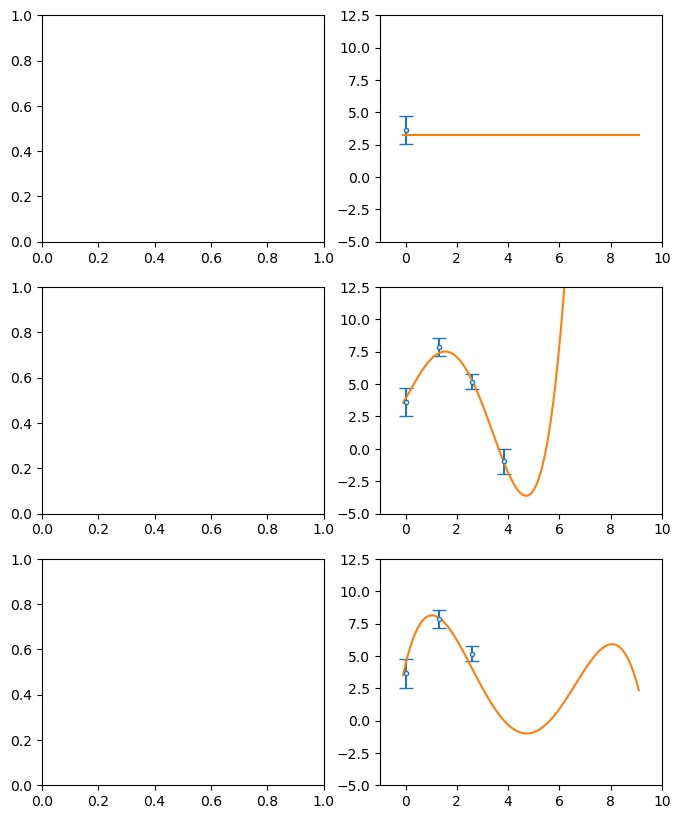

In [43]:
model = lambda x, c0, c1, c2, c3, c4: c0 + c1*x + c2*x**2 + c3*x**3 + c4*x**4
model2 = lambda x, c0, c1: c0+c1*np.sin(x)
xval = np.linspace(min(dataxs)-0.1, max(dataxs)+0.1, 100) 


dataxs = data[0, :]
datays = data[1, :]
datasigs = data[2, :]

fig, ax = plt.subplots(3, 2, figsize=(8, 10), gridspec_kw=dict(hspace=0.2, wspace=.2))

for i in range(len(batches)):
  k = batches[i]
  ax[i][1].errorbar(dataxs[:k], datays[:k], xerr=None, yerr=datasigs[:k], capsize=5, ls='', marker='o', mfc='white', ms=3, mew=1, label=r'Datos')
  
  samples = dataSample[0][i]
  ax[i][1].plot(xval, model(xval, *samples))
  
  ax[i][1].set_xlim(-1, 10)
  ax[i][1].set_ylim(-5, 12.5)

## Fitting. Regresión No lineal de los Mínimos al cuadrado (Non-Linear Least-Squares Fitting)

Hasta ahora el formalismo que hemos visto para implementar el ajuste de mínimos cuadrados, ya sea en forma de máxima verosimilitud (equivalentemente: ecuaciones normales) o siguiendo un enfoque bayesiano, no fue verdaderamente general: todo lo que hemos dicho hasta ahora se aplica al caso de dependencia lineal de los parámetros. Sin embargo, en la práctica es posible que se enfrente a escenarios más complicados, por ejemplo:
$$
p(x)=c_0e^{-c_1 x}
$$
donde como se aprecia la dependencia en $c_i$ no es lineal. Esto se puede ver al intentar derivar la expresión anterior con respecto a $c_1$. 

En estos casos se puede emplear un *truco* y linealizar el problema calculándose el logaritmo natural en ambos lados,
$$
q(x)=d_0+d_1 x
$$
donde $q(x)=\ln p(x)$, y los nuevos parámetros $d_i$ se relacionan con las $c_i$.


`Importante:` El *linealizar* el problema acarrea un problema, y es que tanto en el entorno frecuentista como en el bayesiano se asumió que los errores se distribuían normalmente; manipular la teoría para que se vuelva lineal en los parámetros probablemente eliminará la gaussianidad de sus errores de medición. Aun así, el resultado de una minimización de $\chi^2$ aún podría resultarle útil, en la práctica.

Como pordrán imaginar no siempre es posible linealizar el problema. En lugar de ello, a continuación recurriremos a un enfoque más personalizado, tomando prestadas ideas de la minimización multidimensional y especializándolas para el problema específico en cuestión.


### Método de Gauss–Newton

Como punto de partida consideremos que tenemos $N$ datos con la forma $(x_j, y_j\pm\sigma_j)$ y elegimos una función de aproximación $p(x)$ que depende de $n$ parámetros $c_k$ de manera no lineal. Nuestro objetivo es miminizar el $\chi^2$, para ello introduzcamos la siguiente notación:
<center><img src="capturas/292.png"></center>

nótese que la definición para $b_j$ es similar a la usada anteriormente, pero no así la de $\sigma_j$. En términos de estas cantidades la definición matricial del chi cuadrado 
<center><img src="capturas/253.png"></center>

se reduce a:
<center><img src="capturas/293.png"></center>

donde el vector columna $\rho$ abarca todas las $\rho_j$.

A continuación, utilizaremos el método de minimización de Newton,
<center><img src="capturas/317.png"></center>

el cual modela el gradiente de una función escalar $\phi$ mediante la matriz Jacobiana $J$, buscándose encontrar los valores que hacen cero el grandiente (puntos extremales). En este caso tendremos que la función $\chi^2$ jugará el rol del campo escalar, 
<center><img src="capturas/294.png"></center>

Nótese que la única dependencia de  $\chi^2$ es con respecto a los parámetros $c_i$, los restantes $x_j, y_j, \sigma_j$ se consideran constantes. Esto tiene sentido puesto que queremos miminizar con respecto a los parámetros. Es decir, encontrar la mejor combinación de estos. Por otro lado nótese que el Jacobian $J_{\nabla\chi^2}$ es evaluado en la iteración $k-1$ (previa).

Calculemos primeramente la matriz Jacobian correspondiente a $\rho$
<center><img src="capturas/295.png"></center>

Esta matriz $K_\rho$ tendrá dimensiones $(N\times n)$. En términos de esta matriz tendremos que el gradiente $\nabla\chi^2$ toma la forma
<center><img src="capturas/296.png"></center>

Esta expresión se puede obtener calculándole el gradiente a la definición matricial de $\chi^2$ (expresandolo en componentes)
$$
\nabla_c \chi^2 = \sum_i \frac{\partial}{\partial c_i}\chi^2 = \sum_i \frac{\partial}{\partial c_i}\bigg(\sum_j\chi_j \chi_j\bigg)= \sum_i \sum_j\bigg(\frac{\partial \chi_j}{\partial c_i}\chi_j+\chi_j\frac{\partial \chi_j}{\partial c_i}\bigg)=2 \sum_i \sum_j\frac{\partial \chi_j}{\partial c_i}\chi_j
$$
donde $\chi_j=b_j-\rho_j$. Como el vector $b$ es constante, sus componentes lo son. Por otro lado, el vector $\rho$ tiene una dependencia implícita de los parámetros $c$, lo que nos lleva a
$$
\nabla_c \chi^2 = -2 \sum_i \sum_j\frac{\partial \rho_j}{\partial c_i}\chi_j=-2K_{\rho}^T (b-\rho)
$$

Introduciendo ahora la matriz de Hessiana correspondiente a la función escalar $\rho_j$ tendremos:
<center><img src="capturas/297.png"></center>

la cual tiene dimensión $(n\times n)$. `Nótese`que tendremos $N$ matrices de este tipo.

Usando el resultado anterior podremos reescribir el Jacobiano de $\nabla_c \chi^2 $ como:
<center><img src="capturas/298.png"></center>

Notar que lo que se hizo fue:
$$
\frac{\partial \nabla_c \chi^2}{\partial c_k}=\frac{\partial}{\partial c_k} (-2K_{\rho}^T (b-\rho))=-2\frac{\partial K_{\rho}^T }{\partial c_k} (b-\rho)-2\frac{\partial (b-\rho)}{\partial c_k} K_{\rho}^T=-2\sum_j (b_j-\rho_j)L_{\rho_j}+2K_{\rho}^TK_{\rho}
$$

Evaluando lo anterior en la fórmula de Newton, tendremos:
<center><img src="capturas/299.png"></center>

Notar que tanto $K_\rho$ como $L_\rho$ son cantidades *implícitas* (evaluadas en $C^{(k-1)}$). Por otro lado el segundo término del lado izquierdo incluye el factor residual $b_j-\rho_j$ (residual porque es la diferencia). Si consideramos que $p(x_j)$ es una buena aproximación, la contribución de estos términos puede ser despreciada y bajo esta aproximación llegamos a la fórmula del método de Gauss-Newton
<center><img src="capturas/300.png"></center>

Finalmente tendremos:
$$
c^{(k)}=c^{(k-1)}+\bigg(K_\rho^{T}K_{\rho} \bigg)^{-1}K_\rho^{T}(b-\rho)
$$

Observe que lo que tenemos es un sistema lineal de ecuaciones con una matriz de coeficientes $(n\times n)$ particularmente simple en el lado izquierdo.
Por otro lado, notar que el hecho de despreciar el término que incluia a la segunda derivada $L_p$ hace que este enfoque sea considerablemente menos costoso desde el punto de vista computacional.

### Veamos un ejemplo de como implementar lo anterior:

Consideremos el modelo 
$$
p(x)=c_0+c_1 x^{c_2}
$$

la existencia del parámetro $c_0$ nos impide aplicar el trúco del logarimo y para linealizar el problema. En tal sentido hemos de emplear la metodología anterior.

- Calculando la matrix Jacobiana, tendremos
$$
\frac{\partial p(x_j)}{\partial c_0}=1, \quad \frac{\partial p(x_j)}{\partial c_1}=x_j^{c_2},\quad \frac{\partial p(x_j)}{\partial c_2}= c_1 x_j^{c_2}\ln x_j
$$

In [5]:
# Implementacion
def model(cs, xi):
  p = cs[0] +cs[1]*xi**cs[2]
  return p

def relErrorTot(xolds, xnews):
  errs = np.abs((xnews - xolds)/xnews)
  return np.sum(errs)

def gdata():
  data = np.zeros((3,13))
  data[0,:] = np.array([373.1, 492.5, 733, 755, 799, 820,
              877, 1106, 1125, 1403, 1492, 1522, 1561])
  data[1,:] = np.array([156., 638, 3320, 3810, 4440, 5150,
                        6910, 16400, 17700, 44700, 57400, 60600, 67800])
  data[2,:] = np.ones(data.shape[1])  # dispersion 1 para todos
  
  return data

def getKrs(data, cs):
  """
  rho = p(xj)/sigma_j, b = yj/sigma_j
  """
  K = np.zeros((data.shape[1], cs.size))
  
  K[:,0] = 1/data[2,:]
  K[:,1] = data[0,:]**cs[2]/data[2,:]
  K[:,2] = cs[1]*data[0,:]**cs[2]*np.log(data[0,:])/data[2,:]
  
  rs = (data[1,:] - model(cs, data[0,:]))/data[2,:]  # b-rho
  return K, rs

def gaussnewton(data, ckm1, kmax=50, tol=1.e-8):
  for _ in range(kmax):
    K, rs = getKrs(data, ckm1)
    matK = K.T@K
    invmatK = np.linalg.inv(matK)
    ck = ckm1 + invmatK@K.T@rs
    err = relErrorTot(ckm1, ck)
    if err < tol:
      break
    ckm1 = np.copy(ck)
    
  return ckm1

In [58]:
def getKrs2(data, cs):
  """
  rho = p(xj)/sigma_j, b = yj/sigma_j
  """
  K = np.zeros((data.shape[1], cs.size))
  
  K[:,0] = 1/data[2,:]
  K[:,1] = np.exp(-data[0,:]*cs[2])/data[2,:]
  K[:,2] = -cs[1]*data[0,:]*np.exp(-data[0,:]*cs[2])/data[2,:]
  
  rs = (data[1,:] - model2(cs, data[0,:]))/data[2,:]  # b-rho

  return K, rs

def model2(cs, xi):
  p = cs[0]+cs[1]*np.exp(-cs[2]*xi)
  return p

def gaussnewton2(data, ckm1, kmax=50, tol=1.e-8):
  for _ in range(kmax):
    K, rs = getKrs2(data, ckm1)
    matK = K.T@K
    invmatK = np.linalg.inv(matK)
    ck = ckm1 + invmatK@K.T@rs
    err = relErrorTot(ckm1, ck)
    if err < tol:
      break
    ckm1 = np.copy(ck)
    
  return ckm1

In [61]:
N = 8
np.random.seed(45379)  # fijando la semilla
dataxs = np.linspace(0, 9, N)
datays = 2 + 5*np.exp(0.1*dataxs) + 0.3*np.random.randn(N)  # la última parte es el ruido
datasigs = 0.2*np.abs(np.random.randn(N))

data = np.array([dataxs, datays, datasigs])

ckm1 = np.array([1, 0.5, -.1]) 
ck2 = gaussnewton2(data, ckm1, tol=1.e-05)
print('El mejor ajuste es: ', ck2)

El mejor ajuste es:  [ 1.7919577   4.86015191 -0.10822183]


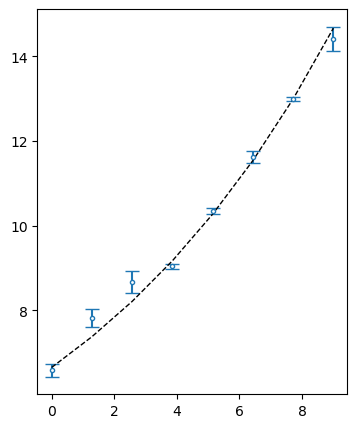

In [62]:
xval = np.linspace(0, 9, N)

fig, ax = plt.subplots(1, 1, figsize=(4, 5), gridspec_kw=dict(hspace=0.2, wspace=.2))

ax.errorbar(data[0], data[1], yerr=data[2], capsize=5, ls='', marker='o', mfc='white', ms=3, mew=1, label=r'Datos')
ax.plot(xval, model2(ck2, xval), ls='--', lw=1, c='k')


In [ ]:
data = gdata()
ckm1 = np.array([-700, 1.26e-8, 4.5])  # [-700, 1.26e-8, 4.5]
ck = gaussnewton(data, ckm1)
ckm1 = np.array([1, 10, -1e-02]) 
ck2 = gaussnewton2(data, ckm1, )
print('El mejor ajuste es: ', ck)
print('El mejor ajuste es: ', ck2)

(100.0, 100000.0)

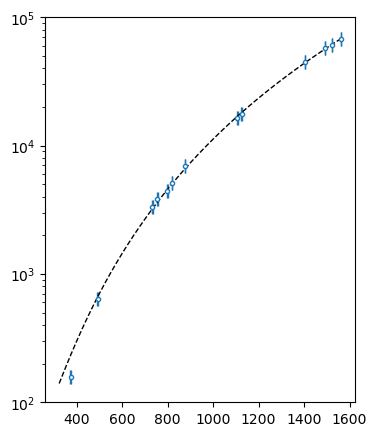

In [7]:
xval = np.linspace(data[0][0]-50, data[0][-1])

fig, ax = plt.subplots(1, 1, figsize=(4, 5), gridspec_kw=dict(hspace=0.2, wspace=.2))

ax.errorbar(data[0], data[1], xerr=data[2], capsize=5, ls='', marker='o', mfc='white', ms=3, mew=1, label=r'Datos')
ax.plot(xval, model(ck, xval), ls='--', lw=1, c='k')
#ax.plot(xval, model(ckm1, xval), ls=':')
ax.plot(xval, model2([1, -10, -1e-02], xval), ls='-')

ax.set_yscale('log')
ax.set_ylim(1e02, 1e05)

## Redes neuronales artificiales (Artificial Neural Networks)

Una situación que ocurre muy frecuentemente es contar con un gran número de datos de los cuales no conocemos su barra de error (sin embargos estos si sufren de un *ruido*). El enfoque que hemos seguido hasta ahora (y es el más natural) es confiar que cada dato posee igual barra de error, en este caso tendremos que el $\chi^2$ estadístico

<center><img src="capturas/318.png"></center>

toma la forma
<center><img src="capturas/301.png"></center>

donde introdujimos un factor $1/N$ por comodidad, así como se definió la variable $s_j$ para denotar el cuadrado de la distancia entre el valor real $y_j$ y el valor aproximado $p(x_j)$.

### Red neuronal de avance (Feedforward Neural Network)

Anteriormente vimos como tratar un problema de ajuste no lineal (en los parámetros). Sin embargo, como vimos en el ejemplo anterior, la metodología es modelo-depend, es decir, su implementación dependerá del modelo usado (para computar la matriz Jacobiana). En este sentido, a continuación presentaremos un enfoque diferente, el de redes neuronales (`El nombre refleja el objetivo de tales enfoques, modelar redes neuronales (biológicos).`).

La idea de este enfoque es básicamente combinar linealidad y no linealidad de una manera específica; mediante la introducción de un gran número de parámetros y de datos (tipicamente grandes), los cuales serán utilizados para determinar los mejores valores (que conducen a un pequeño valor del $\chi^2$ de los residuos):
<center><img src="capturas/301.png"></center>

En el campo del aprendizaje automático, el proceso de determinar buenos valores de parámetros se conoce como `entrenamiento o aprendizaje`. Los parámetros encontrados se utilizan para predecir $p(x)$ para una $x$ que no usada durante el entrenamiento.

Para remover la dependencia del modelo, debemos emplear el ansatz general para la función de aproximación $p(x)$, sin embargo, en este caso no lo escribiremos como una combinación lineal de parámetros y funciones bases 

<center><img src="capturas/302.png"></center>

Sino que lo escribiremos como una única forma funcional, independiente del conjunto de datos. Es decir, seguiremos un enfoque TOTALMENTE diferente a lo seguido hasta ahora. En este caso definiremos una única función *base* no lineal en $\phi$ (conocida como función de activación) y MUCHOS parámetros:
<center><img src="capturas/303.png"></center>


Por simplicidad y conveniencia, es mejor escribir la ecuación anterior, separando los *llamados* a la `función de activación` $\phi$:
<center><img src="capturas/304.png"></center>

`Comentarios:`
- Obsérvese que la función de activación es evaluada dos veces con una extensión de los argumentos (no es un producto).
- Obsérvese que la sumatoria por $k$ es un producto matricial.
-  Nótese que similar a la metodología anterior, tendremos como entrada $x$ y como salida $p(x)$, el cual utilizaremos para aproximar los valores verdaderos. 
- Es importante tener presente que la sumatoria (relacionada con el número de parámetros) NO esta relacionada con el número de datos, y que en TOTAL tendremos $3M+1$ parámetros (a_k, b_k, c_k, d).
- Los parámetros $a_k, b_k$ se conocen como ponderaciones (notar que ponderan a la función $\phi$ y a la variable independiente $x$ respectivamente). - Los parámetros $c_k, d$ se conocen como sesgos.
- Nótese que la idea es extender las funciones base $\phi_k$ mediante la introducción de una UNICA función (de activación) $\phi$ que se evalua dos veces en la expresión.
- Normalmente para el uso de redes neuronales en la regresión no lineal, la función $\phi$ se define como una función no lineal.


A continuación intentemos visualizar la arquitectura que seguiría la red neuronal, para ello consideremos el siguiente diagrama:
<center><img src="capturas/305.png"></center>

En este diagrama los círculos se conoce como NEURONAS (nodos o unidades). Tendremos como única entrada a $x$ (denotada con una $x$ en un círculo), la cual se combinará con los pesos $b_k$ para obtenerse las cantidades intermedias $z_k$, que aparecerían en las capas ocultas o *hidden layer* (son los nodos que aparecen en el centro).

Esta capa de entrada también incluye un círculo relleno (de valor uno), el cual corresponde a los sesgos (*bias*) que aparecen en nuestra función de activación. Como vimos de la ecuación, las variables de sesgo son dos:

- Uno que afectará la entrada, es decir, podemos pensar que el `INPUT` para un $z_k$ dado es de la forma: $b_k\times x+c_k\times 1$. 
- Otro que afectará el valor de *salida* de las capas ocultas, de tal forma que tendremos $a_k \times z_k+d\times1$

Por otro lado, y como se infiere del párrafo anterior, cada una de las unidades intermedias $z_k$, se combina con $a_k$ y se utiliza como entrada para producir la única variable de salida $p(x)$, que aparece en la capa de salida (a la derecha). 

Finalmente el diagrama NO muestra explícitamente las aplicaciones de la función activación, sobre ello hablaremos más adelante. Tampoco muestra el total $M$ de neuronas ocultas, pero sin embargo, podemos imaginar la arquitectura de la red como $1–M–1$ (una entrada, M neuronas, una salida). Es importante señalar que para $M$ neuronas tendremos $n=3M+1$ parámetros.

La arquitectura anterior es un ejemplo de una red neuronal *feedforward* (también conocida como perceptrón multicapa o *multilayer perceptron*) debido a que las conexiones entre nodos no forman un ciclo. Es decir, la información viaja siempre de izqueirda a derecha.

`COMENTARIO:` Dado que solo se emplea una ÚNICA capa ocultad, aplicar esta red neuronal implicará lo que se conoce como un *aprendizaje superficial* (shallow learning). En cambio, si emplearamos dos o tres, (y así sucesivamente) capas ocultas: esto habría involucrado más variables intermedias/neuronas ocultas y llamadas a la función de activación $\phi$ dando lugar a lo que se conoce como *aprendizaje profundo* (deep learning). 

- Un ejemplo sería emplear tres capas ocultas, lo cual correspondería a una arquitectura $1–M–M–M–1$.

En el caso de tener una función escalar de dos variables y considerando un aprendizaje superficial, tendríamos una arquitectura del tipo $2–M–1$.

A CONTINUACIÓN intentemos comprender qué o cómo es la función de activación $\phi$.

- Como indica su nombre, una función de activación se utiliza para ACTIVAR una determinada neurona. Es decir, su función es encenderla o apagarla. Es decir, alterna las neuronas entre dos extremos, por ejemplo $-1, +1$, o $0, +1$.
- Producto del rol de la función de activación, se hace necesario la introducción de los sesgos, ya que estos nos permitirían obtener valores objetivos (o intermedios) fuera de estos dos extremos. Algo que sería imposible sino existieran. (Noten que por ello aparecen sesgos en cada evaluación de la función de activación).
- Modelos más recientes consideran funciones de activación que tienen valores que van de $0$ a infinito, lo cual limita el rol comentado anteriormente para los sesgos.
- Independientemente de la función de activación $\phi$ utilizado, en nuestro caso esta ha de ser no lineal y de una variable de entrada.

Veamos un ejemplo de función de activación, la *softplus*
<center><img src="capturas/307.png"></center>


Si la graficamos tendría la forma:
<center><img src="capturas/306.png"></center>

Como se aprecia, en este caso, la función de activación toma valores en el rango de $0\to +\infty$. Mapea valores positivos a valores positivos, y valores negativos a valores decrecientes más pequeños. LO MÁS IMPORTANTE es que softplus es una función suave. Por ejemplo, si comparamos con la función de activación ReLU (unidad lineal rectificada o *rectified linear unit*), 
<center><img src="capturas/308.png"></center>

la cual es representada con lineas discontinuas.

¿NO QUE LAS FUNCIONES DE ACTIVACIÓN ERAN NO LINEALES?

Del gráfico podemos ver que ReLU pueda considerarse una función lineal, puesto que su gráfico muestra claramente que es una función lineal por partes. 
Lo que ocurre es que se LLAMARÁ *funcion no lineal* (siempre y cuando la entrada sean escalares), a una función que no satisfaga el concepto de álgebra lineal de una función lineal: un mapa lineal, es aquel que satisface la propiedad de aditividad $f(x+y)=f(x)+f(y)$ y de homogeneidad $f(ax)=af(x)$. La función ReLU no satisface la primera de estas propiedades. Por ejemplo tomando $x=-1, y=1$ 
$$
\phi(x+y)=\phi(-1+1) =\phi(0)=0 \quad \neq \quad \phi(x+y)=\phi(x)+\phi(y)=\phi(-1)+\phi(1)=0+1=1
$$

Por lo que no es una función lineal bajo la definición anterior.

A CONTINUACIÓN discutamos el por qué se escogió la única función base de la forma 
<center><img src="capturas/303.png"></center>

Como se aprecia, esta definición implica DOS llamadas a la función de activación $\phi$. Las llamadas múltiples se usan comúnmente cuando abordan problemas de clasificación. Sin embargo, son útilez cuando se trabajar con problemas de regresion. Por otro lado, si consideramos un conjunto de datos que incluya algunos (o todos los) puntos de datos con $y_j$ negativo. Si consideramos la función de activación tipo *softplus*, vemos que solo obtendremos valores positivos, lo que impediría describir el conjunto de datos de forma eficaz. (Un enfoque tradicional para la regresión en redes neuronales es usar la *identidad* como la función de activación) En tal sentido, la implementación que se realizará SOLO será valida para valores no negativos de $y_j$.

### Disminución de gradiente estocástico y retropropagación

Hasta ahora ya hemos especifícado el ansatz para la base, la función de activación y hemos presentado la estructura esquématica de la red. A continuación explicaremos como proceder para determinar los valores para los parámetros capaces de miminizar el $\chi^2$ estadístico para ello hemos de crear una metodología capaz de *aprender* de nuestro conjunto de datos de entrenamiento, de tal forma que encuentre el valor para los parámetros más óptimo.

Uno de los enfoques más simples para implementar este tipo de metodología esta basado en computar derivadas, y se conoce como el método de *disminución del gradiente*
<center><img src="capturas/319.png"></center>

Nótese que en el lado derecho tendremos una evaluación del gradiente, no de la función en sí. Lo que implicará que en cada paso de iteración este método elige la dirección perpendicular a la línea de contorno descrita por la función. 

Aplicando la fórmula anterior y agrupando los $3M+1$ parámetros (a, b, c, d) en un único vector $w$, tendremos
<center><img src="capturas/309.png"></center>

Donde la iteración será por $i$ (recordar que el índice $k$ es para indicar el número de la neurona, y el $j$ el punto del dato). Para simplificar el modelo utilizamos una tasa de aprendizaje constante $\gamma$, mientras que los valores iniciales de los parámetros (es decir $w(0)$) pueden considerarse aleatorios. Notar que en la primera igualdad se tomó el gradiente sobre $\chi^2$, quien representa la función escalar que se desea minimizar, y que este gradiente es respecto a los parámetros $w$. En la segunda igualdad solo sustituimos chi cuadrado en término de los residuales individuales. Este enfoque (que utiliza el $\nabla \chi^2$ completo que surge de todo el conjunto de datos), se conoce como descenso de gradiente por lotes.

Ahora, NOTEMOS ALGO, la implementación de la ecuación anterior implicará que por cada paso de iteración $i$ debemos *procesar* TODO el conjunto de datos, lo cual para un $N$ grande (como suele ocurrir), implicaría un alto costo computacional. Por otro lado, si consideraramos nuevos datos, TODO el proceso se tendría que repetir, lo cual lo hace poco eficiente. 

UN ENFOQUE útil que se emplea para lidiar con lo anterior, es en vez de utilizar $\nabla \chi^2$, usar $\nabla s_j$ a la hora de dar un paso de iteración en el espacio de parámetros (en la primera igualdad):
<center><img src="capturas/310.png"></center>

La idea del nuevo enfoque sería:
- Alcanzar la convergencia (iterando por las $i$) para un $j$ (un datos) dado, para luego pasar al siguiente conjunto.
- Este enfoque lo que hace es realizar una especie de muestreo del gradiente completo (por lotes).

Ahora, podemos cuestionarnos si este enfoque es equivalente al primero, para ello calculemos el valor de expectación para un gradiente individual $\nabla s_j$ (el valor de expectación o media para una variable aleatoria discreta $\chi$ es $E(\chi)=\sum_i P_i^{\chi}x_i$, donde $x_i$ son sus posibles valores y $P_i^{\chi}$ la respectiva probabilidad)
<center><img src="capturas/311.png"></center>

Notemos que asumimos que cada término tiene el mismo peso (probabilidad) de $1/N$ y en la segunda igualdad el orden de la suma y diferenciación se intercambian. El resultado final es el gradiente de nuestros completo $\nabla \chi^2$, por lo que podemos concluir que $\nabla s_j$ es un estimador insesgado (*unbiased estimator) de $\nabla \chi^2$. Esto quiere es decir, que los gradientes individuales serán correctos en promedio. Cualitativamente la razón de este enfoque es que en la práctica al considerar el gradiente completo, es razonable esperar que muchos o todos los residuos de los puntos dados al cuadrado (es decir $s_j$) nos lleven a la región de parámetros que corresponde al mínimo (alejado de la posición inicial aleatoria). En tal sentido, sería un desperdicio de cómputo procesar todos los datos antes de producir nuevos valores de los parámetros ya que con una muestra de estos datos capturaríamos el comportamiento.


Por otro lado, producto de que la toma de muestras del grandiente total es aleatoria, este enfoque recibe el nombre de `descenso de gradiente estocástico`. Notemos que ahora, el introducir un nuevo dato no implicará *correr* todo el análisis, este enfoque secuencial o en línea nos permite producir un nuevo conjunto de parámetros utilizando un solo punto de datos nuevo.

Una gran ventaja de este enfoque respecto al gradiente total, es que el usar sólo un término de punto de datos a la vez para llegar al mínimo introducirá un ruido importante, lo cual puede ser positivo ya que nos ayudaría a *escapar* de los mínimos locales. En general, ocurre que un punto estacionario de $\chi^2$ no tiene porque serlo para $s_j$. Ahora, este comportamiento también puede ser malo, ya que esta *brusquedad* que tendremos en las iteraciones podrían implicar que escapemos incluso del mínimo global de $\chi^2$ (si se alcanza). Un término medio entre los dos enfoques (y se utiliza en la práctica) se conoce como `descenso de gradiente de mini lotes`. En este caso los datos son divididos en bloques y el gradiente se aproxima utilizando la colección de términos residuales ($s_j$) cada vez.

Independientemente del enfoque usado, es necesario calcular $\nabla s_j$. El enfoque de descenso de gradiente estocástico podemos descomponerlo en las siguientes cuatro ecuaciones:
<center><img src="capturas/312.png"></center>

donde el contador $m$ denota la componente partícular de cada conjunto de parámetros (además de usar $i$ para las iteraciones, $j$ para el punto de datos/término residual y $k$ para las neuronas ocultas). Como se aprecia tendremos que computar una derivada, para ello podriamos usar un enfoque de diferencias fínitas, sin embargo, si contamos con una gran cantidad de neuronas $M$ este enfoque será ineficiene y implicará errores. `En la práctica, para redes neuronales formadas por muchas capas ocultas o una sola capa y muchas neuronas, cuando se abordan grandes conjuntos de datos, es muy poco recomendable usar un efoque de diferencias finitas `. El enfoque recomendable a usar es el de retropropagación (*backpropagation*) el cual usa la regla de la cadena. Este enfoque es un caso particular de uno más general, conocido como diferenciación automática hacia atras (reverse-mode automatic differentiation).

Veamos como aplicar esta metodología para el caso en que derivamos con respecto a $a_m$. Partiendo de la definición de residual al cuadrado de un dato $s_j$, tendremos

<center><img src="capturas/313.png"></center>

Usando la definción de la función de aproximación $p(x)$
<center><img src="capturas/304.png"></center>

tendremos
<center><img src="capturas/314.png"></center>

donde para simplificar la notación se suprimió la iteración por $i$ proveniente de la aproximación, y se ha de entender que se está evaluando las $z_k$ en $x_j$. Como notarán necesitamos tener acceso (analítico) a la derivada de la función de activación, $\phi$.

Usando la función de activación softplus podemos escribir/codificar trivialmente su derivada, y usando los resultados previos llegar a:
<center><img src="capturas/315.png"></center>

De manera similar, podemos aplicar la regla de la cadena a las restantes derivadas y aplicar la misma idea para arribar a:
<center><img src="capturas/316.png"></center>

Finalmente ya tenemos todo lo que necesitamos.

`Comentario:`
- La afirmación anterior es válida para el enfoque de `descenso de gradiente estocástico`, es decir, un solo juego de datos $(x_j, y_j)$. En el caso que se desee emplear un `descenso de gradiente por lotes`, la ecuación
<center><img src="capturas/309.png"></center>

nos indica que hemos de sumar las contribuciones de gradiente provenientes de cada una de las $s_j$ del bloque analizado.

In [9]:
import sys
import random

In [10]:
# implementación
def relErrorTot(xolds, xnews):
  """ 
  Función error absoluto estadístico
  """
  errs = np.abs((xnews - xolds)/xnews)
  return np.sum(errs)

def soft(der, x):
  """
  softplus activation function phi and phi'
  der -> orden de la derivada
  x -> término independiente
  """
  if der==0:
    val = np.log(1+np.exp(x))
  elif der==1:
    val = np.exp(x)/(1+np.exp(x))
  else:
    sys.exit('La variable der solo pude ser 0, o 1')
  return val

def getzspofx(W, x, act):
  """ 
  Modelo p(x)
  In:
  W -> vector de parámetros W = [A, B, C, d] 
        -> A = [a0, a1, ..., a_M], B = [b0, b1, ..., b_M], C = [c0, c1, ..., c_M]
  x, y -> conjunto de datos
  act -> función de activación
  """
  der = 0
  zs = act(der, W[1, :]*x + W[2, :])  # neuronas ocultas zk
  pofx = act(der, W[0,:]@zs + W[3, 0])  # notar que  W[3, 0] solo es un valor, pq es d
  return zs, pofx


def backprop(W, xj, yj, act):
  """ 
  backpropagation method
  In:
  W -> vector de parámetros W = [A, B, C, d] 
        -> A = [a0, a1, ..., a_M], B = [b0, b1, ..., b_M], C = [c0, c1, ..., c_M]
  x, y -> par de datos (xi, yi)
  act -> función de activación
  
  Out:
  ders -> vector de la derivada de sj 
       -> ders=[\partial s_j/\partial a_m, \partial s_j/\partial b_m, \partial s_j/\partial c_m,\partial s_j/\partial d_m]
       
       \partial s_j/\partial a_m -> \partial s_j/\partial a = 
  """
  zs, pofx = getzspofx(W, xj, act)  # resultado de la red
  
  ders = np.zeros((4, zs.size))  # matriz de derivadas
  
  # backpropagation method
  der = 1
  am, bm, cm, d = W[0, :], W[1, :], W[2, :], W[3, 0]
  ders[3, 0] = 2*(pofx - yj)*act(der, am@zs + d)  # \partial s_j/\partial d_m
  ders[0, :] = ders[3, 0]*zs  # \partial s_j/\partial a_m
  ders[1, :] = ders[3, 0]*am*xj*act(der, bm*xj*cm)   # \partial s_j/\partial b_m
  ders[2, :] = ders[3, 0]*am*act(der, bm*xj*cm)   # \partial s_j/\partial c_m
  return ders

def sgd(W, x, y, act=soft, g=0.006, kmax=300, tol=1.e-4):
  """
  kmax ->
  g -> es gamma, y representa el sesgo
  
  Out:
  Wn, sj
  """
  for _ in range(1, kmax):
    ders = backprop(W, x, y, act)
    Wn = np.array([W[i, :] - g*ders[i, :] for i in range(4)])  # componentes del vector W 
    
    _, pofxnew = getzspofx(Wn, x, act)  # resultado de la red una iteración después
     
    conds = [relErrorTot(W[i, :], Wn[i,:]) for i in range(3)]  # calculando el error relativo en cada parámetro menos d
    if np.all([val<tol for val in conds]):  # se detiene si todos c
      break
    
    W = np.copy(Wn)  # actualizando
  return Wn, (pofxnew - y)**2

# Create a random number generator, and seed it
myrandom = random.Random(237)
def throwDice(m, k):
    L = []
    for _ in range(m):
        die = myrandom.randrange(1, k+1)
        L.append(die)
    return tuple(L)

def mainNeural(data, W0=None, M=10, It=None, aleat=True, NaleIt=1/2):
  """
  """
  xdat, ydat = data
  if W0:
    W = W0  # debe estar entre -1, 1
  else:
    np.random.seed(5179)
    W = np.random.uniform(-1, 1, (4, M))  # recordar que W = [A, B, C, d] -> A = [a0, a1, ..., a_M], B = [b0, b1, ..., b_M], C = [c0, c1, ..., c_M]
        
  Wval, sjvalues = [], []
  if not It:
    Ndat = len(xdat)*NaleIt
    It = throwDice(len(xdat), 40)
    # numpy.random.choice()
    # print(It)
  
  Wepoca = []
  for l in range(1, 41):
    for i in It:
      gval = 0.001/l**1.3
      Wj, sj = sgd(W, xdat[i], ydat[i], g=gval)
      Wval.append(Wj)
      sjvalues.append(sj)
      # updating
      W = Wj
    Wepoca.append(W)

      
  return Wepoca#Wval, sjvalues

In [11]:
def generatedata(N, a=0., b=9, sts=(2,5,0.5,1)):
    sa, sb, sc, sd = sts
    np.random.seed(7921)
    data = np.zeros((3,N))
    data[0,:] = np.linspace(a,b,N)
    data[1,:] = sa + sb*np.sin(data[0,:])
    data[2,:] = sc + sd*np.random.random(N)
    data[1,:] += np.random.normal(0,data[2,:])
    return data

In [12]:
sts = (1.5, 1.2, 0.15, 0.08)
data = generatedata(400, 0.2, 4.2, sts)
dataU = [data[0], data[1]]
#DatWval, Datsjvalues = mainNeural(dataU, M=10)
DatWval = mainNeural(dataU, M=10)

KeyboardInterrupt: 

In [7]:
Ndat =  155
sts = (1.5, 1.2, 0.15, 0.08)
data = generatedata(400, 0.2, 4.2, sts)
np.random.seed(5179)
W = np.random.uniform(-1, 1, (4, 10))
W, s = sgd(W, data[0, Ndat], data[1, Ndat])
print(s)

5.1844374510785105e-08


In [7]:
DatWvalM = np.mean(DatWval, axis=0)

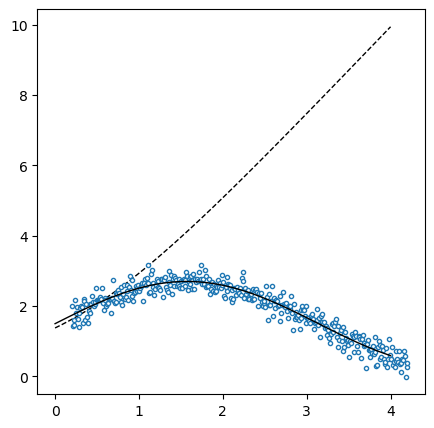

In [21]:
sa, sb, sc, sd = sts
func = lambda sa, sb, x: sa + sb*np.sin(x)

xval = np.linspace(0, 4)

yval = []
for i in xval:
  _, pofx = getzspofx(DatWval[-1], i, soft)
  yval.append(pofx)

fig, ax = plt.subplots(1, 1, figsize=(5, 5), gridspec_kw=dict(hspace=0.2, wspace=.2))

ax.errorbar(data[0, :], data[1, :], ls='', marker='o', mfc='white', ms=3, mew=1, label=r'Datos')
ax.plot(xval, yval, ls='--', lw=1, c='k')
ax.plot(xval, func(sa, sb, xval), ls='-', lw=1, c='k', zorder=10)

#ax.set_yscale('log')
#ax.set_ylim(1e02, 1e05)